Random Forest MSE: 382.6552292623342
Random Forest RMSE: 19.5615753267045
Gradient Boosting MSE: 371.9909481321062
Gradient Boosting RMSE: 19.287066861814584


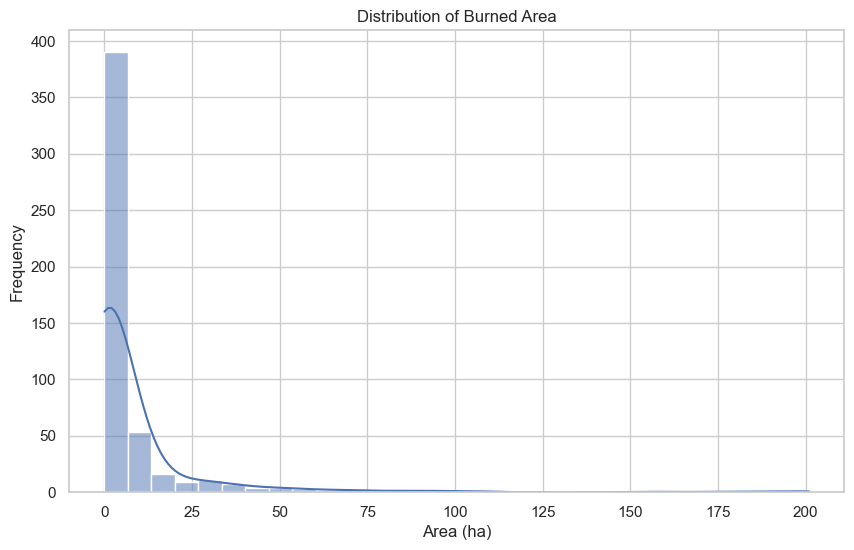

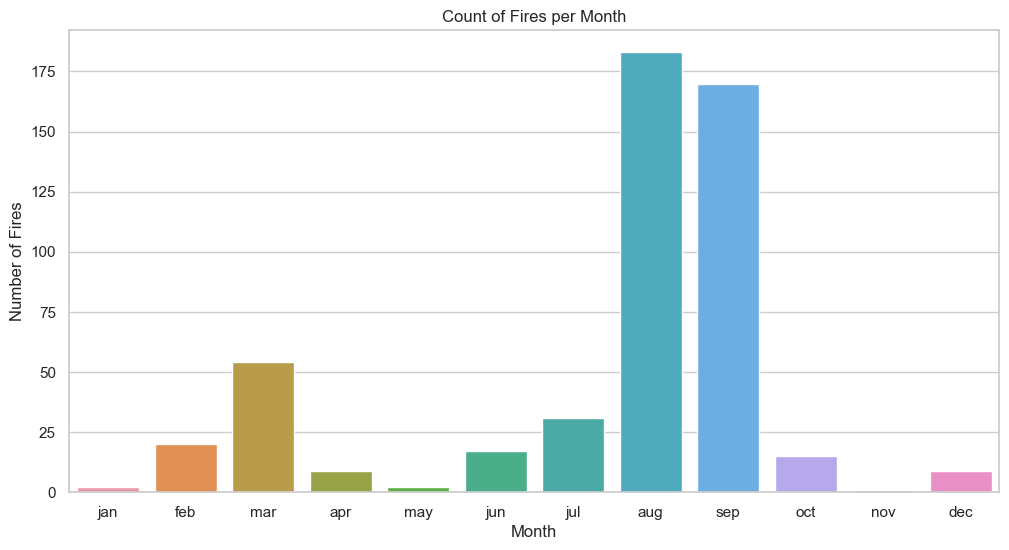

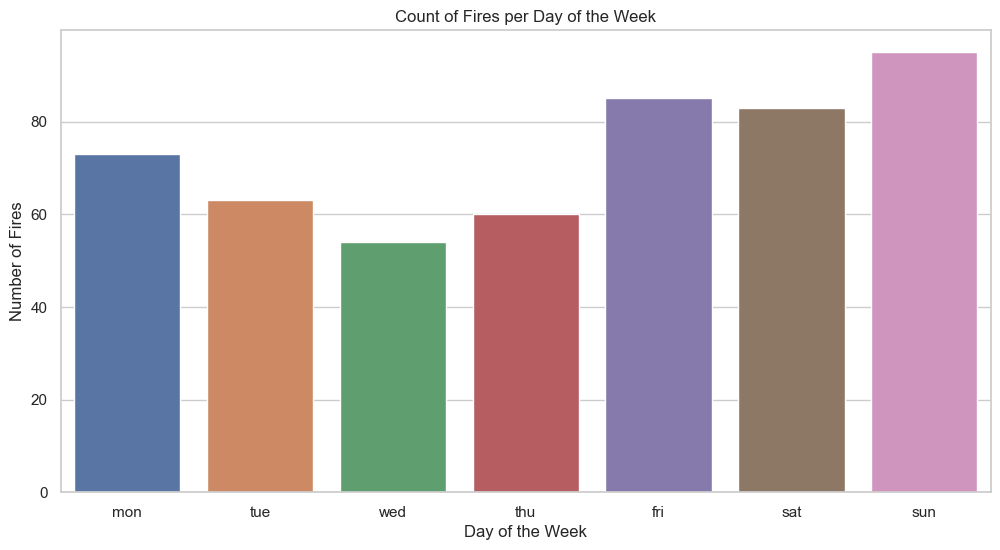

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv('forestfires.csv')

# Handling missing values by removing them
data.dropna(inplace=True)

# Handling outliers using z-score for 'area'
z_scores = stats.zscore(data['area'])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3)
data = data[filtered_entries]

# Save the original month and day for later visualization
months = data['month']
days = data['day']

# Convert 'month' and 'day' to numeric values using one-hot encoding
data = pd.get_dummies(data)

# Selecting features and target variable
X = data.drop(['area'], axis=1)
y = data['area']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Create and train the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

# Predictions with the trained models
rf_pred = rf_model.predict(X_test)
gb_pred = gb_model.predict(X_test)

# Calculate MSE and RMSE
rf_mse = mean_squared_error(y_test, rf_pred)
rf_rmse = np.sqrt(rf_mse)
gb_mse = mean_squared_error(y_test, gb_pred)
gb_rmse = np.sqrt(gb_mse)

# Print out the MSE and RMSE
print("Random Forest MSE:", rf_mse)
print("Random Forest RMSE:", rf_rmse)
print("Gradient Boosting MSE:", gb_mse)
print("Gradient Boosting RMSE:", gb_rmse)

# Set the style of the plots
sns.set_style('whitegrid')

# Plot histogram of the target variable - area
plt.figure(figsize=(10, 6))
sns.histplot(data['area'], bins=30, kde=True)
plt.title('Distribution of Burned Area')
plt.xlabel('Area (ha)')
plt.ylabel('Frequency')
plt.show()

# Plot count plot for the number of fires per month
plt.figure(figsize=(12, 6))
sns.countplot(x=months, data=data, order=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
plt.title('Count of Fires per Month')
plt.xlabel('Month')
plt.ylabel('Number of Fires')
plt.show()

# Plot count plot for the number of fires per day of the week
plt.figure(figsize=(12, 6))
sns.countplot(x=days, data=data, order=['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun'])
plt.title('Count of Fires per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Fires')
plt.show()



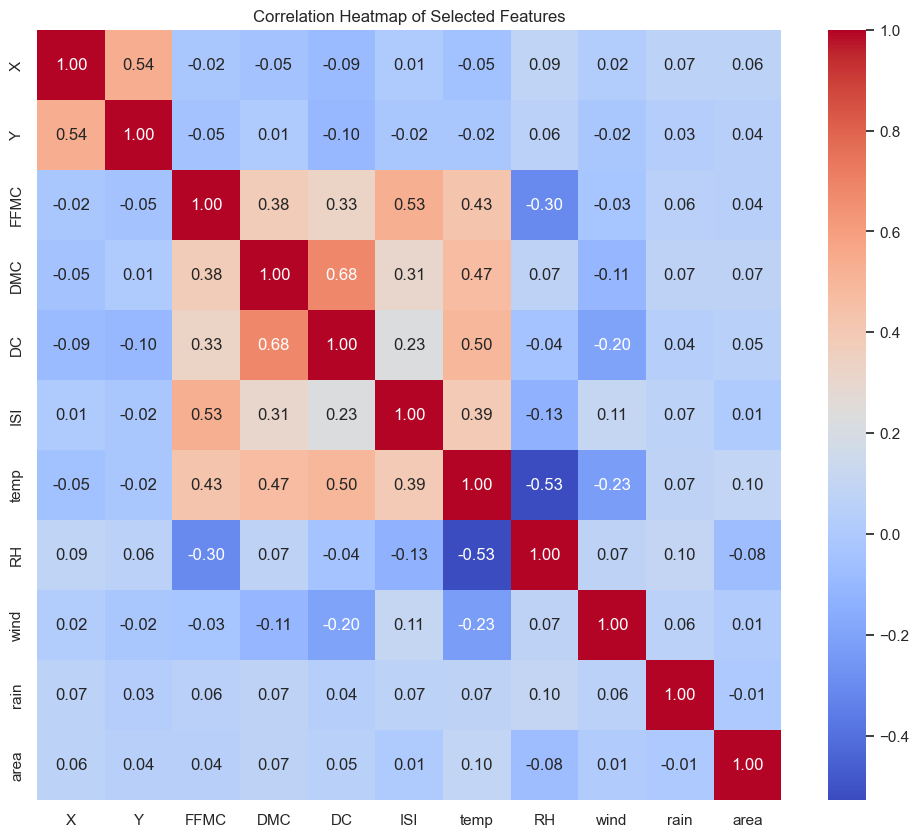

In [11]:
# Correlation heatmap of the selected features
plt.figure(figsize=(12, 10))
sns.heatmap(data_selected.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Selected Features')
plt.show()
